### BANK MARKETING:   
#### Predicting Whether The Customer Will Subscribe To Term Deposit (FIXED DEPOSIT) or not.   
  
#### Business Use Case
There has been a revenue decline for a Portuguese bank and they would like to know what actions to take. After investigation, they found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing efforts on such clients.

#### Project Description  
Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.
You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposit.  
  
#### About The Dataset   
The dataset is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal of this dataset is to predict if the client or the customer of polish banking institution will subscribe a term deposit product of the bank or not. 



#### You are provided with following 2 files:  
1.     train.csv : Use this dataset to train the model. This file contains all the client and call details as well as the target variable “subscribed”. You have to train your model using this file.
2.     test.csv : Use the trained model to predict whether a new set of clients will subscribe the term deposit.
 
#### Dataset Attributes  
Here is the description of all the variables:
•	Variable: Definition
•	ID: Unique client ID
•	age: Age of the client
•	job: Type of job
•	marital: Marital status of the client
•	education: Education level
•	default: Credit in default.
•	housing: Housing loan
•	loan: Personal loan
•	contact: Type of communication
•	month: Contact month
•	day_of_week: Day of week of contact
•	duration: Contact duration
•	campaign: number of contacts performed during this campaign to the client
•	pdays: number of days that passed by after the client was last contacted
•	previous: number of contacts performed before this campaign
•	poutcome: outcome of the previous marketing campaign  

#### Output variable (desired target):  
•	Subscribed (target): has the client subscribed a term deposit? (YES/NO)


In [440]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [441]:
#read data from github link

#train dataset
train_data=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv')#, names=columns )
train_data.sample(7)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
23852,17248,28,management,single,tertiary,no,111,yes,yes,cellular,28,jul,230,2,-1,0,unknown,no
14520,15621,33,technician,married,secondary,no,3071,yes,yes,cellular,21,jul,323,1,-1,0,unknown,no
26000,2555,28,technician,single,secondary,no,26765,no,no,unknown,13,may,210,8,-1,0,unknown,no
12231,27339,38,technician,married,secondary,no,1,yes,no,cellular,21,nov,57,5,199,1,success,no
24998,2455,26,services,married,secondary,no,380,yes,no,unknown,13,may,260,3,-1,0,unknown,no
31256,31821,32,admin.,single,secondary,no,5,yes,yes,cellular,8,apr,110,1,-1,0,unknown,no
6453,34385,33,management,married,tertiary,no,17946,yes,no,cellular,4,may,15,4,87,6,failure,no


In [442]:
#test dataset
test_data=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv')#, names=columns )
test_data.sample(7)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
5885,42893,61,management,married,tertiary,no,175,no,no,telephone,4,feb,79,2,183,2,success
7110,449,32,services,single,secondary,no,310,yes,no,unknown,6,may,144,1,-1,0,unknown
290,24953,45,unemployed,divorced,secondary,no,728,yes,yes,cellular,18,nov,107,1,-1,0,unknown
5696,41981,50,technician,single,secondary,no,3897,no,no,cellular,26,oct,298,1,-1,0,unknown
6695,28586,30,services,single,secondary,no,3405,no,no,cellular,29,jan,276,2,-1,0,unknown
4598,9844,51,admin.,married,unknown,no,3558,yes,no,unknown,9,jun,80,3,-1,0,unknown
8354,5819,47,services,married,secondary,no,2070,yes,yes,unknown,26,may,136,1,-1,0,unknown


In [443]:
test_data.shape

(13564, 17)

In [444]:
train_data.shape

(31647, 18)

Rows = 31647 and  Columns = 18

In [445]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


#### int64 data type = 8 columns  
#### object data type = 10 columns

In [446]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


#### Finding null values

In [447]:
train_data.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [448]:
test_data.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

#### # Observation : No null values in Train and Test dataset

#### # Check for unique values

In [449]:
for column in train_data:
    print(train_data[column].value_counts())


26110    1
13339    1
39681    1
15135    1
26037    1
        ..
1247     1
15584    1
25376    1
38699    1
14156    1
Name: ID, Length: 31647, dtype: int64
32    1457
31    1417
33    1406
34    1321
35    1314
      ... 
92       1
95       1
93       1
94       1
90       1
Name: age, Length: 76, dtype: int64
blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64
married     19095
single       8922
divorced     3630
Name: marital, dtype: int64
secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64
no     31062
yes      585
Name: default, dtype: int64
 0        2470
 1         137
 2         109
 4          95
 3          88
          ... 
 15120       1
-713         1
-905         1
 4722        1
 296

In [450]:
for column in train_data:
    print('\n',column," : \n",train_data[column].unique())


 ID  : 
 [26110 40576 15320 ... 19710 38556 14156]

 age  : 
 [56 31 27 57 33 50 45 35 36 44 39 43 41 53 64 48 60 29 30 42 46 32 63 47
 49 52 68 26 58 38 54 40 59 24 37 34 61 55 20 69 25 62 22 51 28 70 66 23
 87 71 74 81 73 76 72 84 19 79 75 21 83 80 67 18 77 65 82 86 78 88 92 95
 93 89 94 90]

 job  : 
 ['admin.' 'unknown' 'services' 'management' 'technician' 'retired'
 'blue-collar' 'housemaid' 'self-employed' 'student' 'entrepreneur'
 'unemployed']

 marital  : 
 ['married' 'divorced' 'single']

 education  : 
 ['unknown' 'secondary' 'tertiary' 'primary']

 default  : 
 ['no' 'yes']

 balance  : 
 [1933    3  891 ... 2787 8741 2968]

 housing  : 
 ['no' 'yes']

 loan  : 
 ['no' 'yes']

 contact  : 
 ['telephone' 'cellular' 'unknown']

 day  : 
 [19 20 18 22  4  2  3  8 15  5 28  6 14  7 24 13  9 11 21 12 30 27 17 16
 25 10  1 29 26 31 23]

 month  : 
 ['nov' 'jul' 'jun' 'feb' 'sep' 'jan' 'may' 'aug' 'apr' 'oct' 'mar' 'dec']

 duration  : 
 [  44   91  240 ...  939  839 1973]

 camp

In [451]:
for column in test_data:
    print(test_data[column].value_counts())


38441    1
23664    1
23378    1
18945    1
32574    1
        ..
4606     1
23686    1
35672    1
8550     1
34839    1
Name: ID, Length: 13564, dtype: int64
32    628
34    609
35    580
31    579
33    566
     ... 
95      1
86      1
92      1
89      1
90      1
Name: age, Length: 75, dtype: int64
blue-collar      2890
management       2819
technician       2290
admin.           1540
services         1251
retired           690
entrepreneur      479
self-employed     456
unemployed        398
housemaid         366
student           303
unknown            82
Name: job, dtype: int64
married     8119
single      3868
divorced    1577
Name: marital, dtype: int64
secondary    6978
tertiary     4000
primary      2043
unknown       543
Name: education, dtype: int64
no     13334
yes      230
Name: default, dtype: int64
 0       1044
 1         58
 2         47
 3         46
 4         44
         ... 
-140        1
 6495       1
 8180       1
 3684       1
 4256       1
Name: balance, Len

#### # Obsevations:  
ID         :   continious data  
age        :   continious data    
job        :   categorical data  
marital    :   categorical data  
education  :   categorical data  
default    :   categorical data  
balance    :   continious data  
housing    :   categorical data  
loan       :   categorical data  
contact    :   categorical data  
day        :   continious data  
month      :   categorical data  
duration   :   continious data  
campaign   :   categorical data  
pdays      :   continious data  
previous   :   continious data  
poutcome   :   categorical data  
subscribed :   categorical data  


#### # Also confirming NO Null Values in data

### # Encoding the object data types

In [452]:
# for train data
lab_enc=LabelEncoder()
data=[]
data=train_data[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'subscribed']]

for column in data:
    df=lab_enc.fit_transform(data[column])
    data[column]=pd.Series(df)
    train_data[column]=data[column]
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   ID          31647 non-null  int64
 1   age         31647 non-null  int64
 2   job         31647 non-null  int32
 3   marital     31647 non-null  int32
 4   education   31647 non-null  int32
 5   default     31647 non-null  int32
 6   balance     31647 non-null  int64
 7   housing     31647 non-null  int32
 8   loan        31647 non-null  int32
 9   contact     31647 non-null  int32
 10  day         31647 non-null  int64
 11  month       31647 non-null  int32
 12  duration    31647 non-null  int64
 13  campaign    31647 non-null  int64
 14  pdays       31647 non-null  int64
 15  previous    31647 non-null  int64
 16  poutcome    31647 non-null  int32
 17  subscribed  31647 non-null  int32
dtypes: int32(10), int64(8)
memory usage: 3.1 MB


In [453]:
train_data.sample(10)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
23803,2592,37,4,1,2,0,1330,1,0,2,13,8,60,1,-1,0,3,0
21044,39166,57,7,0,0,0,2225,1,0,0,18,8,8,4,-1,0,3,0
3412,44944,40,3,1,2,0,0,0,0,2,6,10,6,1,-1,0,3,0
16405,413,39,0,2,1,0,-25,1,0,2,6,8,576,1,-1,0,3,0
17598,34179,33,6,1,2,0,263,0,0,0,4,8,119,2,-1,0,3,0
12257,25275,30,7,0,1,0,0,1,1,0,18,9,174,2,111,3,0,0
2876,12708,39,4,1,2,0,1007,1,0,0,7,5,86,2,-1,0,3,0
22296,40283,37,0,2,2,0,1000,1,0,0,15,6,322,1,90,1,2,1
15803,36808,31,1,1,0,0,2581,0,0,0,12,8,240,1,365,2,0,0
11511,12058,49,9,0,1,0,1669,1,0,2,20,6,34,3,-1,0,3,0


In [454]:
# for test data
data1=[]
data1=test_data[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']]

for column in data1:
    df=lab_enc.fit_transform(data1[column])
    data1[column]=pd.Series(df)
    test_data[column]=data1[column]
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         13564 non-null  int64
 1   age        13564 non-null  int64
 2   job        13564 non-null  int32
 3   marital    13564 non-null  int32
 4   education  13564 non-null  int32
 5   default    13564 non-null  int32
 6   balance    13564 non-null  int64
 7   housing    13564 non-null  int32
 8   loan       13564 non-null  int32
 9   contact    13564 non-null  int32
 10  day        13564 non-null  int64
 11  month      13564 non-null  int32
 12  duration   13564 non-null  int64
 13  campaign   13564 non-null  int64
 14  pdays      13564 non-null  int64
 15  previous   13564 non-null  int64
 16  poutcome   13564 non-null  int32
dtypes: int32(9), int64(8)
memory usage: 1.3 MB


In [455]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         13564 non-null  int64
 1   age        13564 non-null  int64
 2   job        13564 non-null  int32
 3   marital    13564 non-null  int32
 4   education  13564 non-null  int32
 5   default    13564 non-null  int32
 6   balance    13564 non-null  int64
 7   housing    13564 non-null  int32
 8   loan       13564 non-null  int32
 9   contact    13564 non-null  int32
 10  day        13564 non-null  int64
 11  month      13564 non-null  int32
 12  duration   13564 non-null  int64
 13  campaign   13564 non-null  int64
 14  pdays      13564 non-null  int64
 15  previous   13564 non-null  int64
 16  poutcome   13564 non-null  int32
dtypes: int32(9), int64(8)
memory usage: 1.3 MB


#### # Now our data set (train and test data sets) is Encoded and converted all columns to Int64

### # EDA

In [456]:
# checking again for Null values
train_data.isna().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [457]:
test_data.isna().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

#### Basic stats

In [458]:
train_data.describe()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,4.332923,1.167220,1.225013,0.018485,1363.890258,0.555629,0.162132,0.644642,15.835466,5.533131,258.113534,2.765697,39.576042,0.574272,2.566152,0.117389
std,13075.936990,10.625134,3.271868,0.607186,0.749195,0.134700,3028.304293,0.496904,0.368578,0.899480,8.337097,3.004247,257.118973,3.113830,99.317592,2.422529,0.982069,0.321888
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,11218.000000,33.000000,1.000000,1.000000,1.000000,0.000000,73.000000,0.000000,0.000000,0.000000,8.000000,3.000000,104.000000,1.000000,-1.000000,0.000000,3.000000,0.000000
50%,22519.000000,39.000000,4.000000,1.000000,1.000000,0.000000,450.000000,1.000000,0.000000,0.000000,16.000000,6.000000,180.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,33879.500000,48.000000,7.000000,2.000000,2.000000,0.000000,1431.000000,1.000000,0.000000,2.000000,21.000000,8.000000,318.500000,3.000000,-1.000000,0.000000,3.000000,0.000000
max,45211.000000,95.000000,11.000000,2.000000,3.000000,1.000000,102127.000000,1.000000,1.000000,2.000000,31.000000,11.000000,4918.000000,63.000000,871.000000,275.000000,3.000000,1.000000


#### # Dropping the column 'ID' as same is only showing identity for the row

In [459]:
train_data=train_data.drop(['ID'], axis=1)

In [460]:
train_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,0,1,3,0,1933,0,0,1,19,9,44,2,-1,0,3,0
1,31,11,1,1,0,3,0,0,0,20,5,91,2,-1,0,3,0
2,27,7,1,1,0,891,1,0,0,18,5,240,1,-1,0,3,0
3,57,4,0,2,0,3287,0,0,0,22,6,867,1,84,3,2,1
4,31,9,1,1,0,119,1,0,0,4,3,380,1,-1,0,3,0


In [461]:
test_data=test_data.drop(['ID'], axis=1)
test_data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
13559,39,4,1,2,0,45,0,0,0,28,1,148,4,-1,0,3
13560,54,1,1,0,0,2281,1,0,2,20,6,158,1,-1,0,3
13561,35,5,1,0,0,285,1,0,0,29,4,136,1,-1,0,3
13562,29,0,2,1,0,464,0,0,0,9,9,208,2,91,3,2
13563,29,0,1,1,0,2,1,0,0,6,8,339,1,362,1,0


again looking for basis stats

In [462]:
train_data.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,40.957247,4.332923,1.167220,1.225013,0.018485,1363.890258,0.555629,0.162132,0.644642,15.835466,5.533131,258.113534,2.765697,39.576042,0.574272,2.566152,0.117389
std,10.625134,3.271868,0.607186,0.749195,0.134700,3028.304293,0.496904,0.368578,0.899480,8.337097,3.004247,257.118973,3.113830,99.317592,2.422529,0.982069,0.321888
min,18.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,1.000000,1.000000,0.000000,73.000000,0.000000,0.000000,0.000000,8.000000,3.000000,104.000000,1.000000,-1.000000,0.000000,3.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,450.000000,1.000000,0.000000,0.000000,16.000000,6.000000,180.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,48.000000,7.000000,2.000000,2.000000,0.000000,1431.000000,1.000000,0.000000,2.000000,21.000000,8.000000,318.500000,3.000000,-1.000000,0.000000,3.000000,0.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,102127.000000,1.000000,1.000000,2.000000,31.000000,11.000000,4918.000000,63.000000,871.000000,275.000000,3.000000,1.000000


#### Observation:  
looking into the columns having continious data   
  
#### age :   
mean and 50% are almost same so data seems to be normally distributed around mean

#### balance:  
skewness seen in data on Right side  
  
#### day:  
mean and 50% are almost same so data seems to be normally distributed around mean  

#### duration:  
skewness seen in data on Right side 

#### pdays & previous columns:  
not getting any insite as showing 0.00 and -1.00 values for 25%, 50% and 75% respective columns



### # Visualizing the dataset

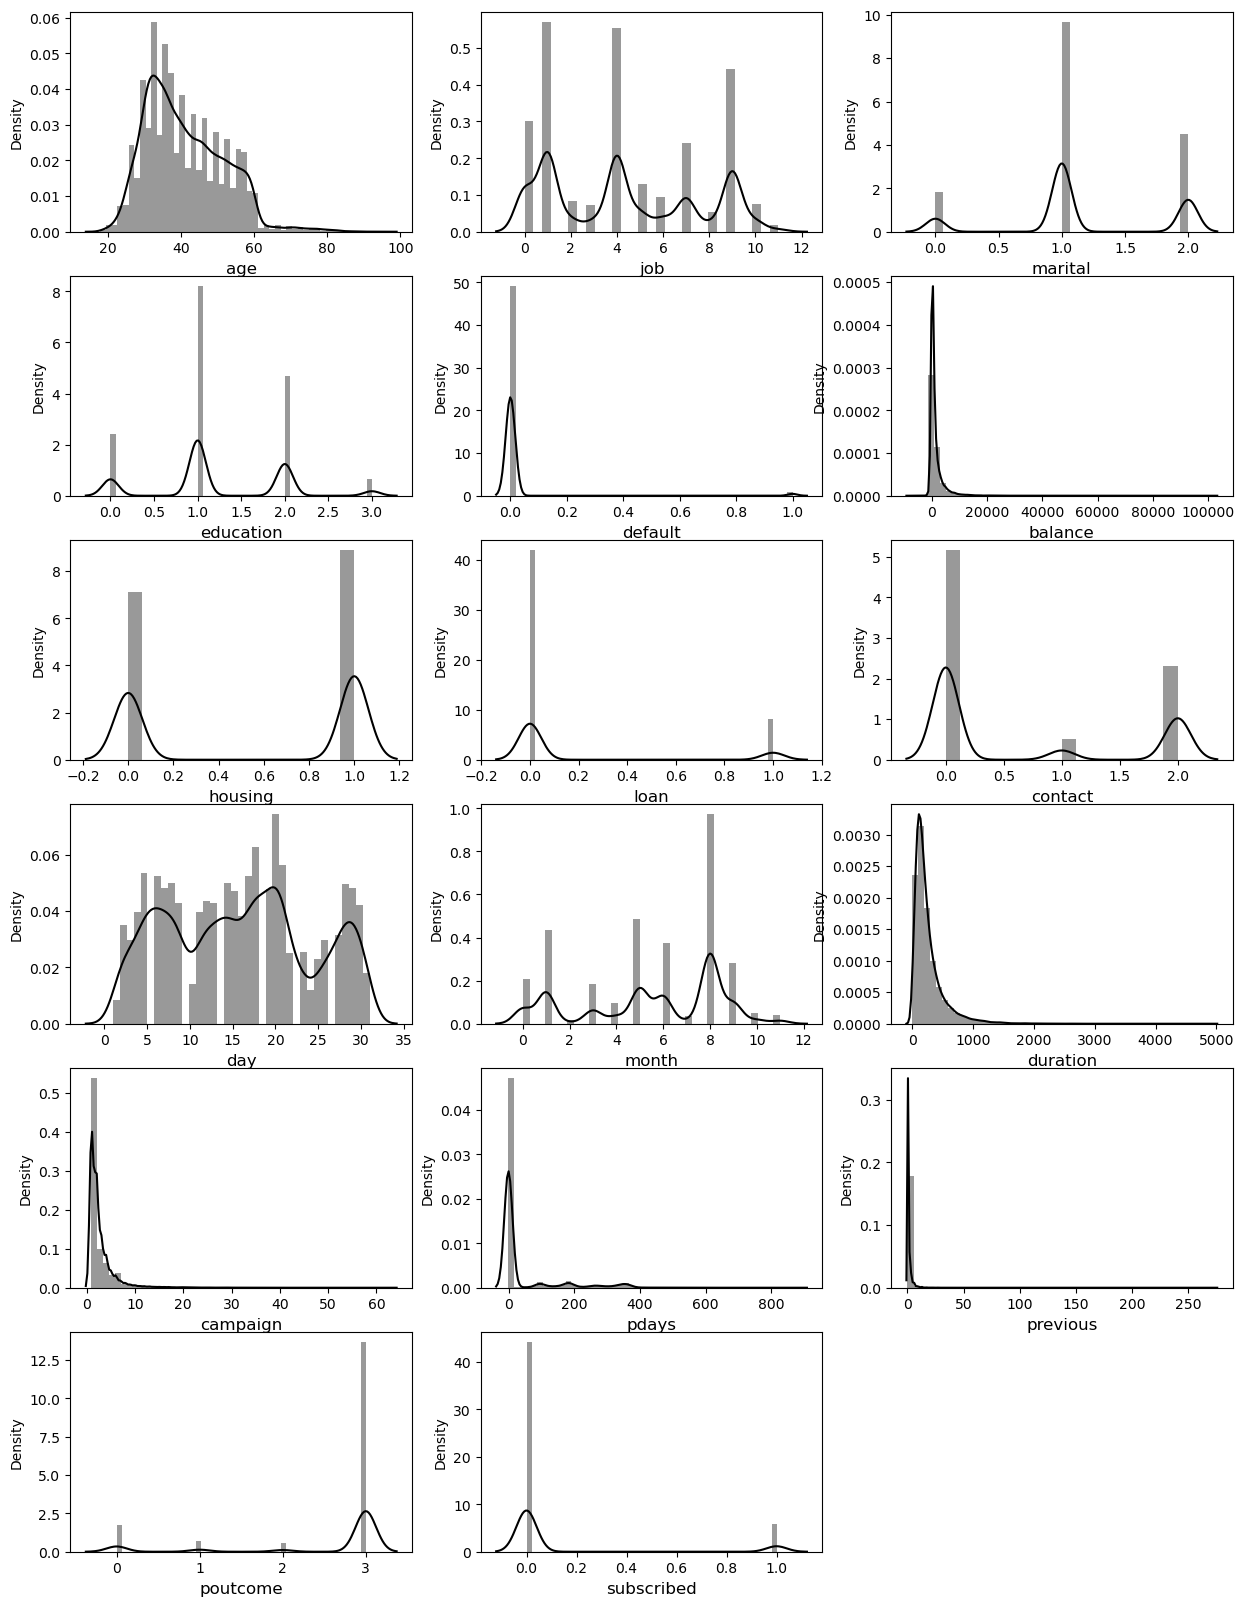

In [463]:
plt.figure(figsize=(15,20))
pltno=1
for column in train_data:
    if pltno<=17:
        plt.subplot(6,3,pltno)
        sns.distplot(train_data[column], color='black')
        plt.xlabel(column, fontsize=12)
    pltno+=1
plt.show()

#### Observations:  
Right Skewness visible of columns - 'age', 'balance', 'duration', 'pdays' and 'previous'


### # Box plot

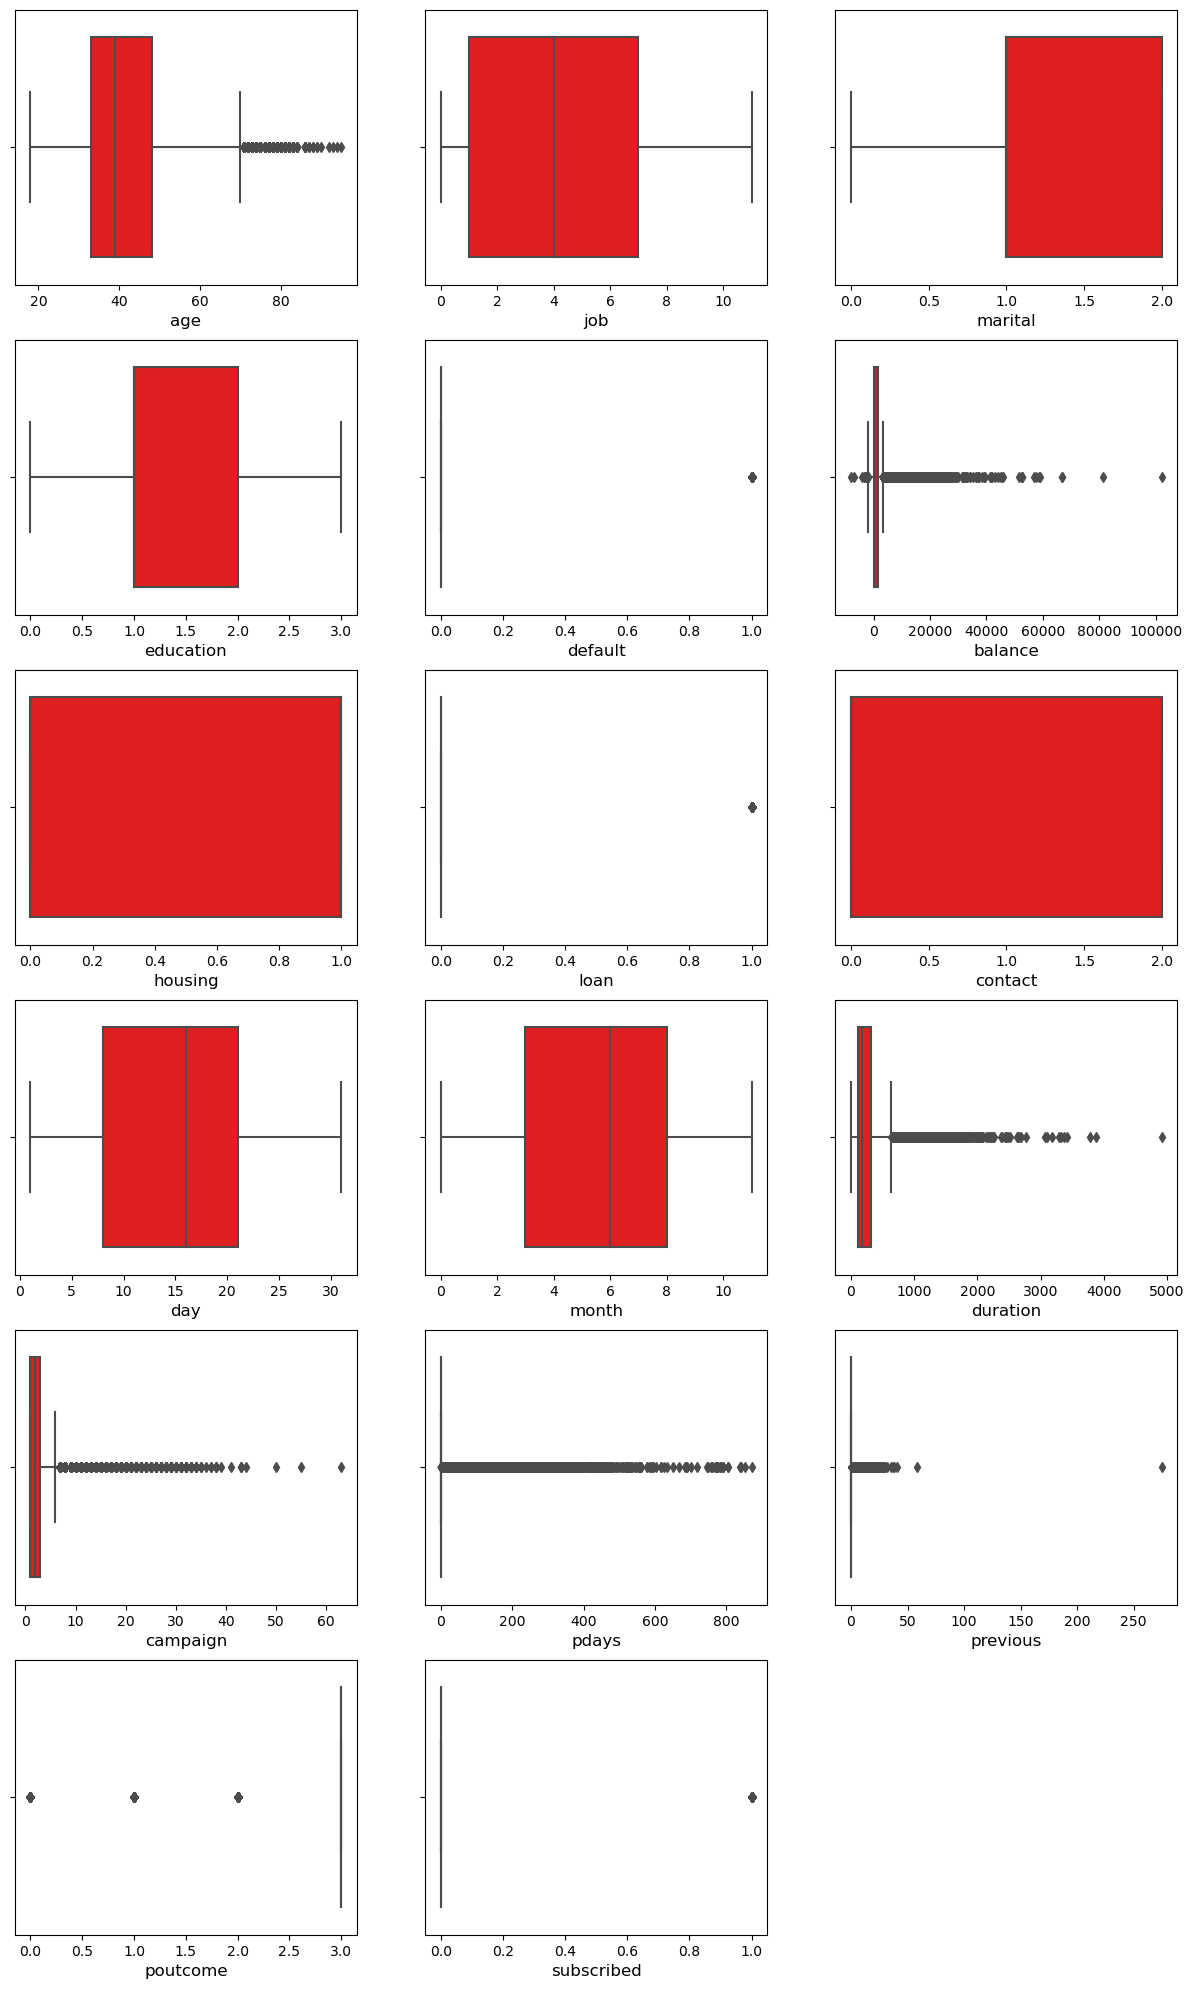

In [464]:
plt.figure(figsize=(15,25))
pltno=1
for column in train_data:
    if pltno<=17:
        plt.subplot(6,3,pltno)
        sns.boxplot(train_data[column], color='red')
        plt.xlabel(column, fontsize=12)
    pltno +=1
plt.show()

#### Observations:  
outliears visible for columns - 'age', 'balance', 'duration', 'pdays' and 'previous'

#### # detecting outliers

In [465]:
df=train_data
z = np.abs(stats.zscore(df[['age','balance','duration','pdays','previous']]))
df=df[(z<3).all(axis=1)]
df.shape

(28709, 17)

In [466]:
comp['new'] = df.skew()
comp['old'] = train_data.skew()
comp

,new,old
age,0.438251,0.681607
job,0.260996,0.264817
marital,-0.095257,-0.100071
education,0.199576,0.199441
default,6.936038,7.149903
balance,2.440379,7.995696
housing,-0.202157,-0.223918
loan,1.782849,1.833474
contact,0.687927,0.758602
day,0.059553,0.087185


#### # Observations :  
Right skewness in columns - 'balance', 'duration', 'pdays', 'previous'  
Left skewness in column - 'poutcome' # as this column is not having continiou data so we will skip this column

#### We will be keeping the data as it is as most of the columns are catagorical in nature

In [467]:
# applying Z score method 

z = np.abs(stats.zscore(train_data[['age','balance','duration','pdays','previous']]))
train_data=train_data[(z<3).all(axis=1)]
train_data.shape

(28709, 17)

In [468]:
train_data.skew()

age           0.438251
job           0.260996
marital      -0.095257
education     0.199576
default       6.936038
balance       2.440379
housing      -0.202157
loan          1.782849
contact       0.687927
day           0.059553
month        -0.461717
duration      1.595455
campaign      4.765782
pdays         2.863544
previous      3.736439
poutcome     -2.509410
subscribed    2.664808
dtype: float64

#### data looks good now

In [469]:
train_data.shape

(28709, 17)

#### Applying same to test data as well

In [470]:
#applying z score method

z = np.abs(stats.zscore(test_data[['age','balance','duration','pdays','previous']]))
test_data=test_data[(z<3).all(axis=1)]
test_data.shape

(12313, 16)

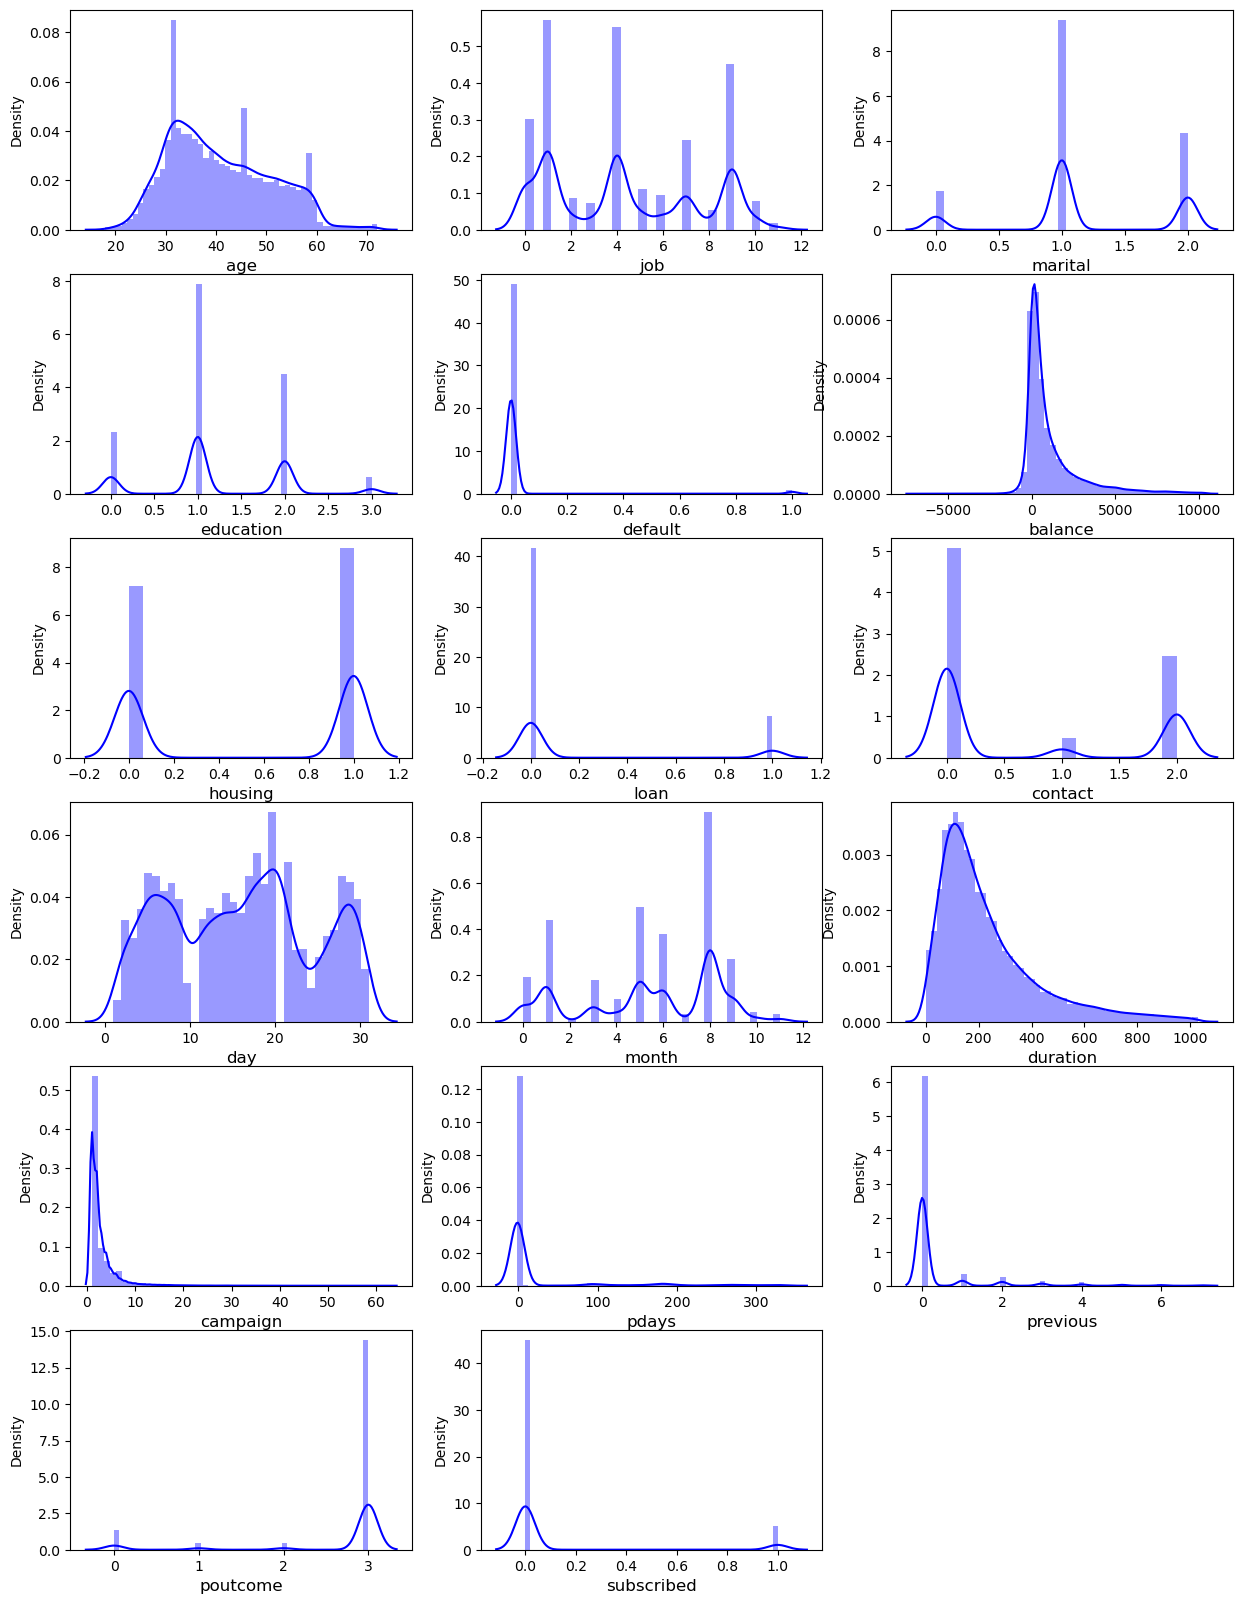

In [471]:
#re-plotting dist plot

plt.figure(figsize=(15,20))
pltno=1
for column in train_data:
    if pltno<=17:
        plt.subplot(6,3,pltno)
        sns.distplot(train_data[column], color='b')
        plt.xlabel(column, fontsize=12)
    pltno+=1
plt.show()

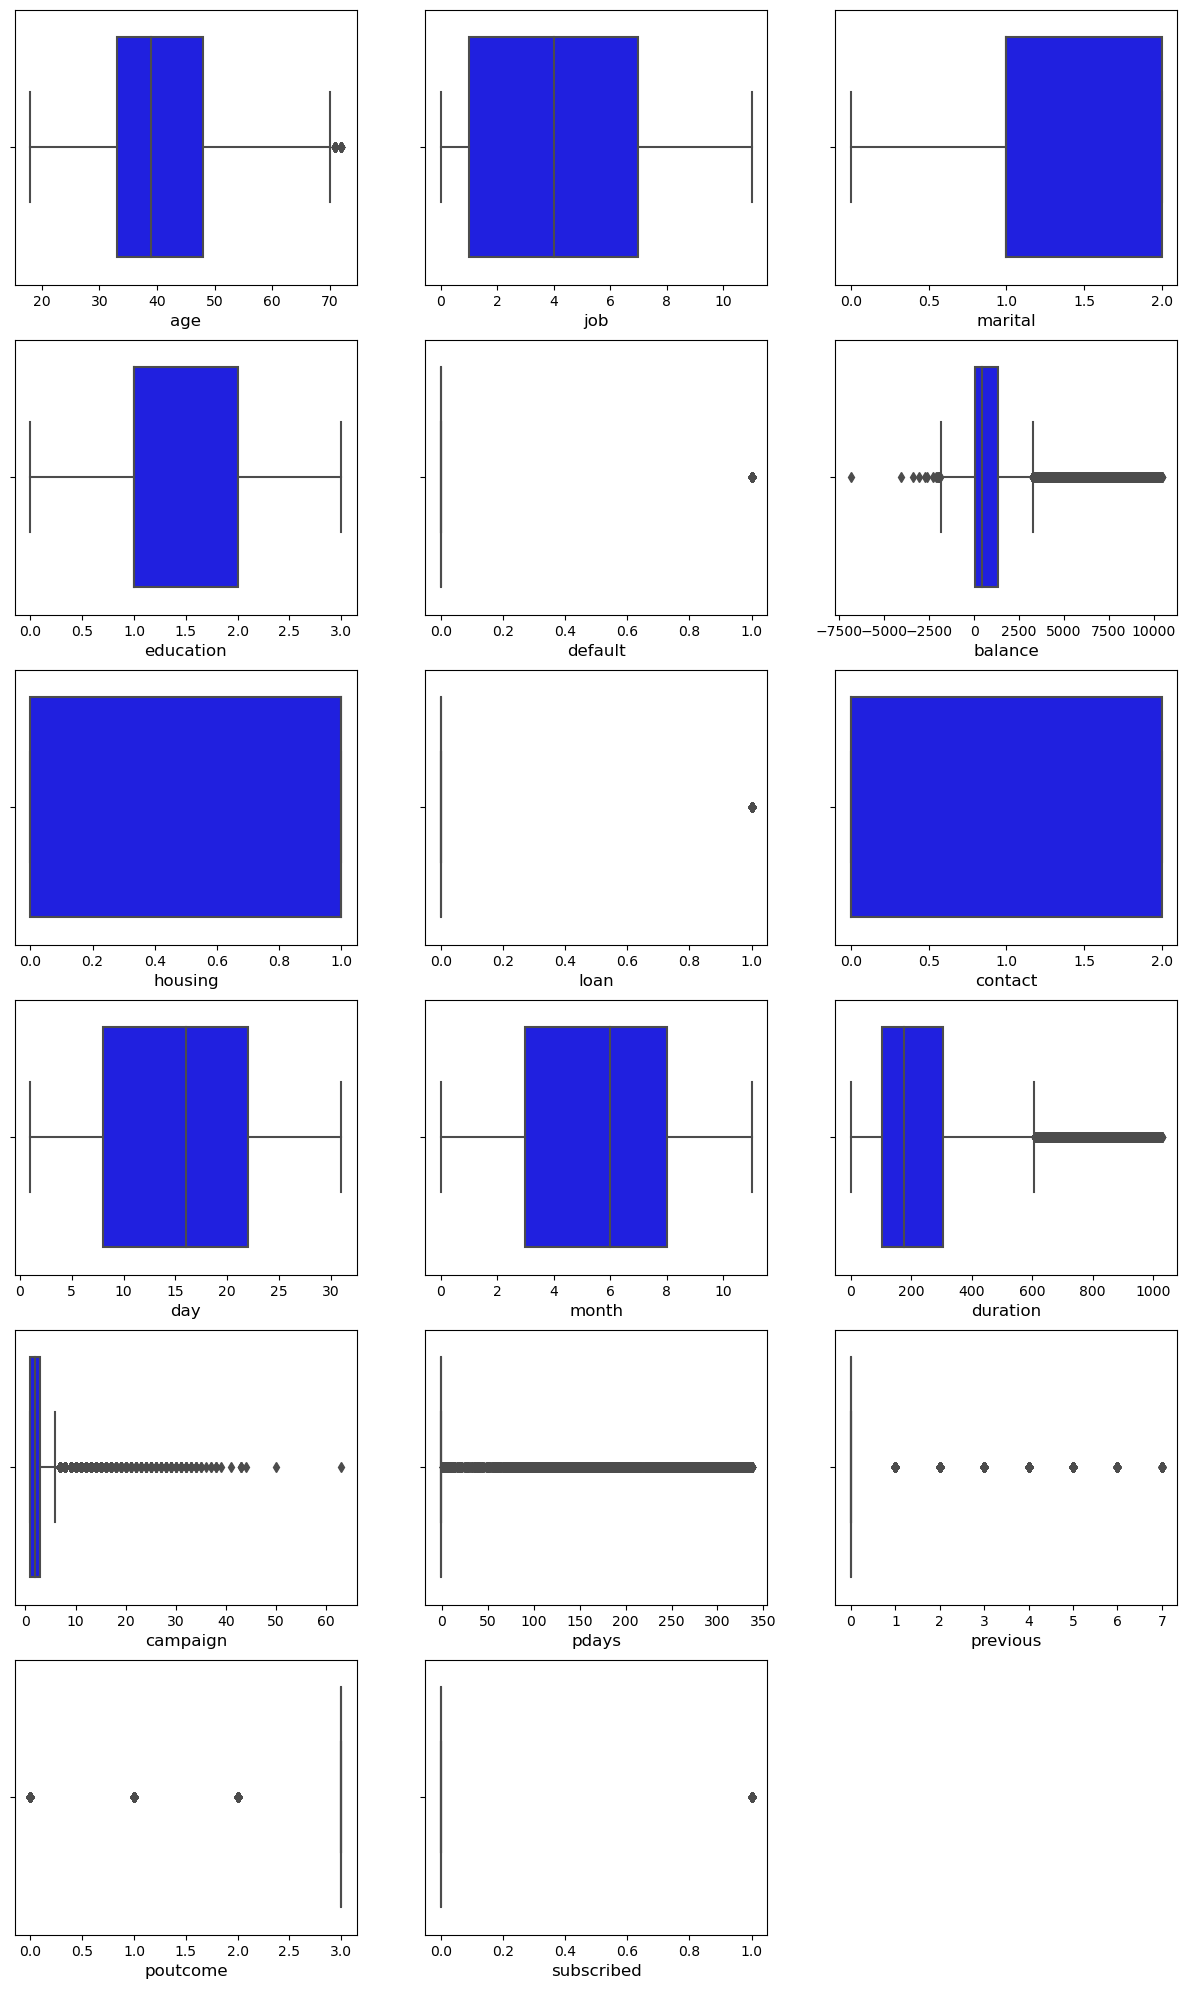

In [472]:
#re-ploting box plot

plt.figure(figsize=(15,25))
pltno=1
for column in train_data:
    if pltno<=17:
        plt.subplot(6,3,pltno)
        sns.boxplot(train_data[column], color='b')
        plt.xlabel(column, fontsize=12)
    pltno +=1
plt.show()

### # Co-relation heat map

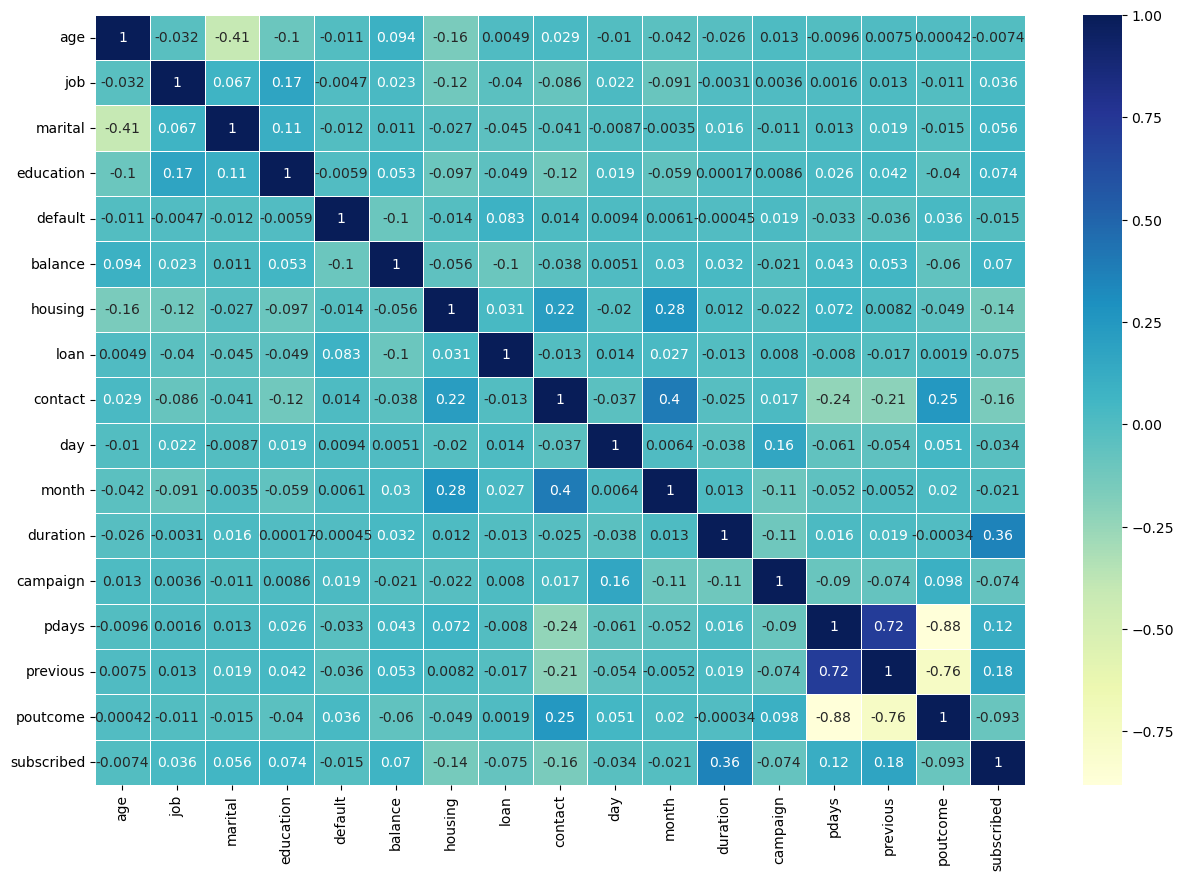

In [473]:
plt.subplots(figsize=(15,10))
sns.heatmap(train_data.corr(),cmap='YlGnBu',annot=True, linewidth=.5)
plt.show()

#### # Observation:  
columns 'pdays' and 'poutcome' are -88% co-related, and 'pdays' column is 72% corelated with 'previous' column  
also columns 'previous' and 'poutcome' are -76% co-related  


#### so we are dropping 'poutcome' and 'pdays' columns

In [474]:
train_data=train_data.drop(['poutcome'], axis=1)
train_data=train_data.drop(['pdays'], axis=1)
train_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,subscribed
0,56,0,1,3,0,1933,0,0,1,19,9,44,2,0,0
1,31,11,1,1,0,3,0,0,0,20,5,91,2,0,0
2,27,7,1,1,0,891,1,0,0,18,5,240,1,0,0
3,57,4,0,2,0,3287,0,0,0,22,6,867,1,3,1
4,31,9,1,1,0,119,1,0,0,4,3,380,1,0,0


In [475]:
train_data.isnull().sum()

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
previous      0
subscribed    0
dtype: int64

In [476]:
# droping 'poutcome' and 'pdays' columns from test data as well
test_data=test_data.drop(['poutcome'], axis=1)
test_data=test_data.drop(['pdays'], axis=1)
test_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous
0,32,7,1,1,0,118,1,0,0,15,8,20,6,0
2,31,6,2,2,0,144,1,0,2,16,8,676,1,0
3,57,7,2,0,0,3777,1,0,1,13,8,65,2,0
4,45,1,0,1,0,-705,0,1,2,3,5,111,1,0
5,32,4,2,2,0,0,1,0,0,22,5,455,2,0


In [477]:
test_data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
previous     0
dtype: int64

#### Plotting co-relation heat map again

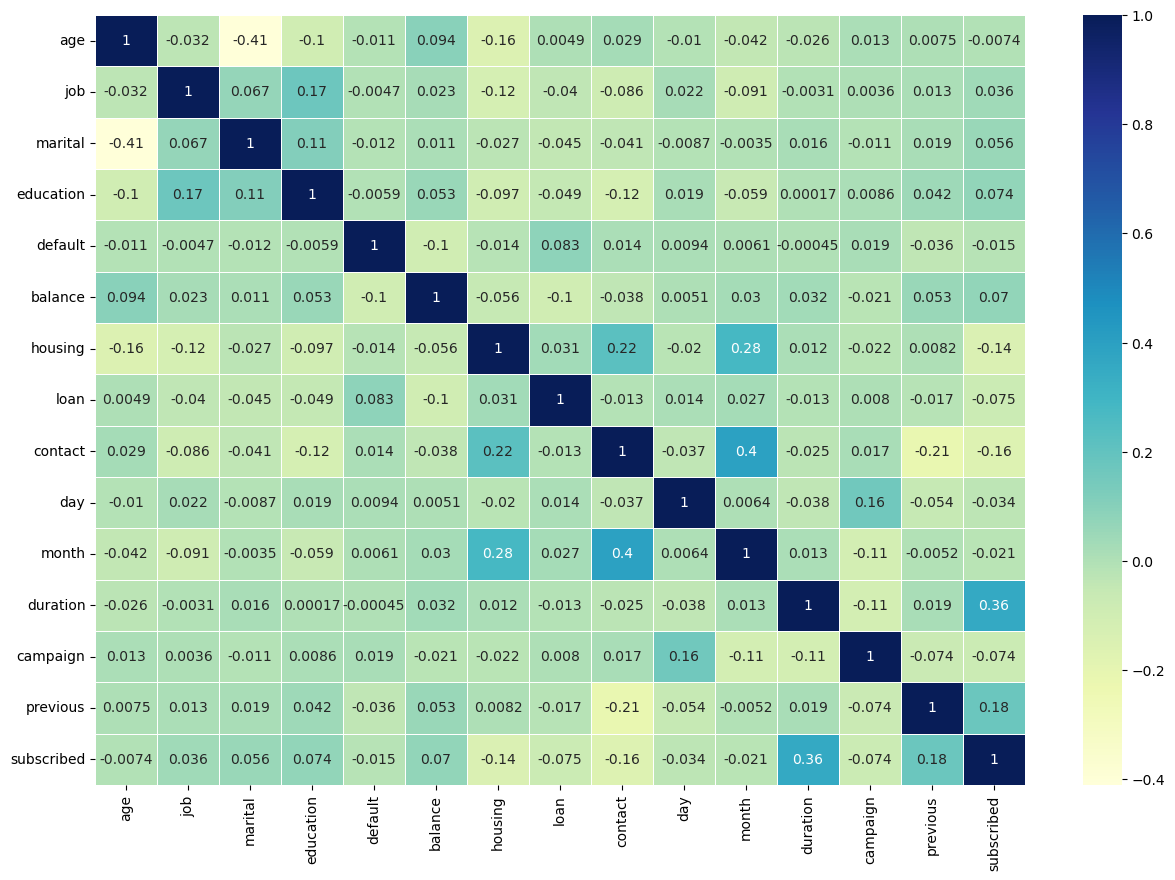

In [478]:

plt.subplots(figsize=(15,10))
sns.heatmap(train_data.corr(),cmap='YlGnBu',annot=True, linewidth=.5)
plt.show()

Now the data is looking good with no major inter co-relation

#### Checking for the data balancing

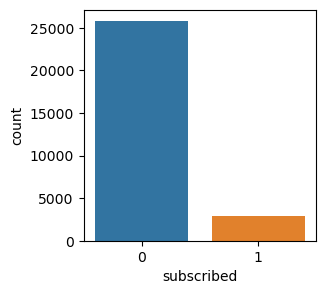

In [492]:
plt.figure(figsize=(3,3))
sns.countplot(x='subscribed',data=train_data)
plt.show()

#### # Observation: clearly having imbalance in the data


### # Using Oversampling Method for balancing the data

In [494]:
from imblearn.over_sampling import SMOTE
X=train_data.drop(['subscribed'], axis=1)
y=train_data['subscribed']

sm=SMOTE()
x1,y1=sm.fit_resample(X,y)

In [495]:
y1.value_counts()

0    25835
1    25835
Name: subscribed, dtype: int64

#### Now we are having equal samples for data

#### # Standard scalar

In [496]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler=StandardScaler()


In [497]:
X_scaler=scaler.fit_transform(x1)
X_scaler

array([[ 1.54951885, -1.43377625, -0.1568289 , ..., -1.16606262,
        -0.12858939, -0.42567042],
       [-0.90663196,  2.21301404, -0.1568289 , ..., -0.97065618,
        -0.12858939, -0.42567042],
       [-1.29961608,  0.88690848, -0.1568289 , ..., -0.35117622,
        -0.51362726, -0.42567042],
       ...,
       [ 0.4688125 , -0.10767069, -0.1568289 , ...,  0.14357624,
        -0.51362726, -0.42567042],
       [ 0.66530456,  0.88690848, -0.1568289 , ..., -0.87503176,
        -0.51362726, -0.42567042],
       [-1.20137005, -0.43919708, -0.1568289 , ..., -0.81682559,
        -0.12858939, -0.42567042]])

### # Model Building

In [498]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [501]:
x_train,x_test,y_train,y_test=train_test_split(X_scaler,y1,test_size=0.25,random_state=rs)
y_test

38359    1
14334    0
35897    1
18657    0
48637    1
        ..
29873    1
36824    1
24725    0
15600    1
17618    0
Name: subscribed, Length: 12918, dtype: int32

In [502]:
# Importing all other libraries for modeling
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.model_selection import cross_val_score

In [503]:
# Random Forest Classifier
rs=0
max_acc=0
for i in range(100):
    x_train,x_test,y_train,y_test=train_test_split(X_scaler,y1,test_size=0.25,random_state=i)
    rf=RandomForestClassifier()
    rf.fit(x_train,y_train)
    y_pred=rf.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    if accuracy > max_acc:
        max_acc=accuracy
        rs=i
print("Max accuracy score : ", max_acc, "   , at Random state : ", rs)

Max accuracy score :  0.9380709088094132    , at Random state :  24


#### Max acuracy is 93% at Random state - 24, so we will use Random State 24 for other models

#### Test Train Split

In [504]:
x_train,x_test,y_train,y_test=train_test_split(X_scaler,y1,test_size=0.25,random_state=rs)
x_test

array([[ 0.4688125 ,  1.21843487, -0.1568289 , ...,  0.47202535,
        -0.51362726,  1.38330196],
       [-1.39786212,  1.54996126,  1.50847097, ..., -1.11201403,
         2.18163787, -0.42567042],
       [-0.71013989, -0.10767069, -0.1568289 , ..., -0.27633971,
        -0.51362726,  2.28778815],
       ...,
       [ 0.56705853,  1.54996126, -0.1568289 , ..., -0.77524975,
         0.64148637,  0.47881577],
       [-1.29961608, -1.10224986,  1.50847097, ...,  0.74642588,
        -0.51362726,  1.38330196],
       [-0.90663196, -0.10767069,  1.50847097, ..., -1.03301994,
        -0.51362726, -0.42567042]])

In [505]:
# Random Forest Classifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rfc_y_pred=rf.predict(x_test)
print("accuracy_score :", accuracy_score(y_test,rfc_y_pred))
print("\n confusion_matrix  : \n", confusion_matrix(y_test,rfc_y_pred))
print("\n classification_report  : \n", classification_report(y_test,rfc_y_pred))

accuracy_score : 0.9363678588016721

 confusion_matrix  : 
 [[5912  559]
 [ 263 6184]]

 classification_report  : 
               precision    recall  f1-score   support

           0       0.96      0.91      0.93      6471
           1       0.92      0.96      0.94      6447

    accuracy                           0.94     12918
   macro avg       0.94      0.94      0.94     12918
weighted avg       0.94      0.94      0.94     12918



In [506]:
#Support Vector Classifier
svc=SVC()
svc.fit(x_train, y_train)
svc_y_pred=svc.predict(x_test)
print("accuracy_score :", accuracy_score(y_test,svc_y_pred))
print("\n confusion_matrix  : \n", confusion_matrix(y_test,svc_y_pred))
print("\n classification_report  : \n", classification_report(y_test,svc_y_pred))

accuracy_score : 0.8918563245084379

 confusion_matrix  : 
 [[5572  899]
 [ 498 5949]]

 classification_report  : 
               precision    recall  f1-score   support

           0       0.92      0.86      0.89      6471
           1       0.87      0.92      0.89      6447

    accuracy                           0.89     12918
   macro avg       0.89      0.89      0.89     12918
weighted avg       0.89      0.89      0.89     12918



In [507]:
#Gradient Boosting Classifier
gb=GradientBoostingClassifier()
gb.fit(x_train, y_train)
gb_y_pred=gb.predict(x_test)
print("accuracy_score :", accuracy_score(y_test,gb_y_pred))
print("\n confusion_matrix  : \n", confusion_matrix(y_test,gb_y_pred))
print("\n classification_report  : \n", classification_report(y_test,gb_y_pred))

accuracy_score : 0.9007586313670847

 confusion_matrix  : 
 [[5657  814]
 [ 468 5979]]

 classification_report  : 
               precision    recall  f1-score   support

           0       0.92      0.87      0.90      6471
           1       0.88      0.93      0.90      6447

    accuracy                           0.90     12918
   macro avg       0.90      0.90      0.90     12918
weighted avg       0.90      0.90      0.90     12918



In [508]:
#AdaBoost Classifier
ab=AdaBoostClassifier()
ab.fit(x_train, y_train)
ab_y_pred=ab.predict(x_test)
print("accuracy_score :", accuracy_score(y_test,ab_y_pred))
print("\n confusion_matrix  : \n", confusion_matrix(y_test,ab_y_pred))
print("\n classification_report  : \n", classification_report(y_test,ab_y_pred))

accuracy_score : 0.8840377767456262

 confusion_matrix  : 
 [[5561  910]
 [ 588 5859]]

 classification_report  : 
               precision    recall  f1-score   support

           0       0.90      0.86      0.88      6471
           1       0.87      0.91      0.89      6447

    accuracy                           0.88     12918
   macro avg       0.88      0.88      0.88     12918
weighted avg       0.89      0.88      0.88     12918



In [509]:
#Bagging Classifier
bag=BaggingClassifier()
bag.fit(x_train,y_train)
bag_y_pred=bag.predict(x_test)
print("accuracy_score :", accuracy_score(y_test,bag_y_pred))
print("\n confusion_matrix  : \n", confusion_matrix(y_test,bag_y_pred))
print("\n classification_report  : \n", classification_report(y_test,bag_y_pred))

accuracy_score : 0.9278526087629664

 confusion_matrix  : 
 [[5928  543]
 [ 389 6058]]

 classification_report  : 
               precision    recall  f1-score   support

           0       0.94      0.92      0.93      6471
           1       0.92      0.94      0.93      6447

    accuracy                           0.93     12918
   macro avg       0.93      0.93      0.93     12918
weighted avg       0.93      0.93      0.93     12918



In [510]:
#Extra Trees Classifier
et=ExtraTreesClassifier()
et.fit(x_train,y_train)
et_y_pred=et.predict(x_test)
print("accuracy_score :", accuracy_score(y_test,et_y_pred))
print("\n confusion_matrix  : \n", confusion_matrix(y_test,et_y_pred))
print("\n classification_report  : \n", classification_report(y_test,et_y_pred))


accuracy_score : 0.9348970428858957

 confusion_matrix  : 
 [[5902  569]
 [ 272 6175]]

 classification_report  : 
               precision    recall  f1-score   support

           0       0.96      0.91      0.93      6471
           1       0.92      0.96      0.94      6447

    accuracy                           0.93     12918
   macro avg       0.94      0.93      0.93     12918
weighted avg       0.94      0.93      0.93     12918



#### So, the accuracy scores are:  
Random Forest Classifier - 93.68%  
support vector Classifier - 89.18%  
Gradient Boosting Classifier - 90.07%  
AdaBoost Classifier - 88.40%  
Bagging Classifier - 92.78%  
Extra Trees Classifier - 93.48%  
#### So the best of them is Random Forest Classifier with 93.68% accuracy  

### # Cross validation score

In [511]:
from sklearn.model_selection import cross_val_score

In [512]:
#Cross validation for Random forest classifier
cv_score = cross_val_score(rf,X_scaler,y1,cv=7,scoring='accuracy')
print(cv_score)
print(cv_score.mean())
print('difference in score Random forest classifier : ', (accuracy_score(y_test,rfc_y_pred)-cv_score.mean()))

[0.8237605  0.95041994 0.94730425 0.94838098 0.94973581 0.95014226
 0.94811001]
0.9311219640255387
difference in score Random forest classifier :  0.005245894776133353


In [513]:
#Cross validation for support vector classifier
cv_score = cross_val_score(svc,X_scaler,y1,cv=7,scoring='accuracy')
print(cv_score)
print(cv_score.mean())
print('difference in score support vector classifier : ', (accuracy_score(y_test,svc_y_pred)-cv_score.mean()))

[0.77675427 0.90056895 0.90083988 0.9076006  0.90624577 0.9067877
 0.90773608]
0.8866476055683622
difference in score support vector classifier :  0.005208718940075685


In [514]:
#Cross validation for Gradient Boosting classifier
cv_score = cross_val_score(gb,X_scaler,y1,cv=7,scoring='accuracy')
print(cv_score)
print(cv_score.mean())
print('difference in score Gradient Boosting classifier :  ', (accuracy_score(y_test,gb_y_pred)-cv_score.mean()))

[0.7923327  0.91099973 0.90260092 0.91220702 0.91505216 0.91058122
 0.90841349]
0.8931696066473495
difference in score Gradient Boosting classifier :   0.007589024719735216


In [515]:
#Cross validation for AdaBoost classifier
cv_score = cross_val_score(ab,X_scaler,y1,cv=7,scoring='accuracy')
print(cv_score)
print(cv_score.mean())
print('difference in score AdaBoost classifier : ', (accuracy_score(y_test,ab_y_pred)-cv_score.mean()))

[0.76578163 0.89867245 0.89068003 0.89500068 0.904349   0.89743937
 0.89202005]
0.8777061734935259
difference in score AdaBoost classifier :  0.00633160325210036


In [516]:
#Cross validation for Bagging classifier
cv_score = cross_val_score(bag,X_scaler,y1,cv=7,scoring='accuracy')
print(cv_score)
print(cv_score.mean())
print('difference in score Bagging classifier : ', (accuracy_score(y_test,bag_y_pred)-cv_score.mean()))

[0.80885939 0.94337578 0.94134381 0.94458745 0.94418101 0.94323262
 0.94147135]
0.9238644864424898
difference in score Bagging classifier :  0.003988122320476628


In [517]:
#Cross validation for Extratree classifier
cv_score = cross_val_score(et,X_scaler,y1,cv=7,scoring='accuracy')
print(cv_score)
print(cv_score.mean())
print('difference in score Extratree classifier : ', (accuracy_score(y_test,et_y_pred)-cv_score.mean()))

[0.81888377 0.95055541 0.94581414 0.95203902 0.94987129 0.95258095
 0.94811001]
0.9311220846319918
difference in score Extratree classifier :  0.0037749582539039483


#### # Since Extra Tree classifier is having cross val score of 94.8% with difference in cross val and  accuracy sore is only 0.00377, so we select Extra Tree Classifier as final model

### # Hyper Parameter Tuning

In [518]:
from sklearn.model_selection import GridSearchCV

In [521]:
params={'criterion' : ['entropy','gini'],
       'random_state' : [0,15,30],
       'max_depth' : [0,10,30],
       'n_jobs' : [-2,-1,1],
       'n_estimators' : [10,20,30]}


In [523]:
gscv=GridSearchCV(et,params,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [0, 10, 30], 'n_estimators': [10, 20, 30],
                         'n_jobs': [-2, -1, 1], 'random_state': [0, 15, 30]})

In [524]:
gscv.best_params_

{'criterion': 'gini',
 'max_depth': 30,
 'n_estimators': 30,
 'n_jobs': -2,
 'random_state': 30}

In [525]:
gscv.best_score_

0.9279004831842718

In [526]:
best_model=ExtraTreesClassifier(criterion = 'gini', max_depth= 30, n_estimators= 30, n_jobs= -2,random_state= 30)
best_model.fit(x_train,y_train)
y_pred=best_model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print('accuracy of the model is :  ', accuracy*100,"%" )

accuracy of the model is :   93.60582133457191 %


### # Confusion Matrix

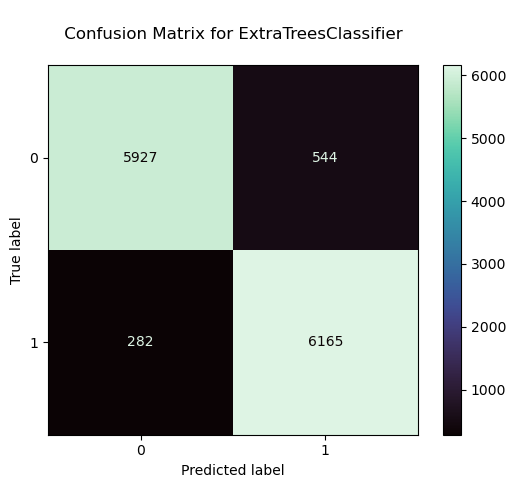

In [528]:
from sklearn import metrics

class_names = train_data.columns
metrics.plot_confusion_matrix(best_model.fit(x_train,y_train), x_test, y_test, cmap='mako')
plt.title('\n Confusion Matrix for ExtraTreesClassifier \n')
plt.show()

### # Saving model

In [529]:
import pickle
pickle.dump(best_model,open('Bank_marketing_project','wb'))

In [530]:
model=pickle.load(open('Bank_marketing_project','rb'))

In [531]:
prediction = model.predict(test_data)
prediction

array([0, 0, 1, ..., 0, 1, 1])

In [532]:
df=pd.DataFrame()
df['predicted']=prediction
df

,predicted
0,0
1,0
2,1
3,0
4,0
...,...
12308,1
12309,0
12310,0
12311,1
